# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#importing the data frame
df= pd.read_json('data/world_bank_projects.json')

In [70]:
#gaining knowledge about the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [69]:
#exlporing the first few rows of the data frame
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [48]:
#filling all the missing values(irresptective of their data type to NaN)
df.fillna(np.NaN)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


1. Find the 10 countries with most projects

In [49]:
# finding the frequency of each country in the data frame by the 'countryname' column
# and printing the top 10 values (0-9) from it.
top_10_countries=df['countryname'].value_counts()[0:10]
print(top_10_countries)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


Text(0.5, 1.0, '10 countries with most projects')

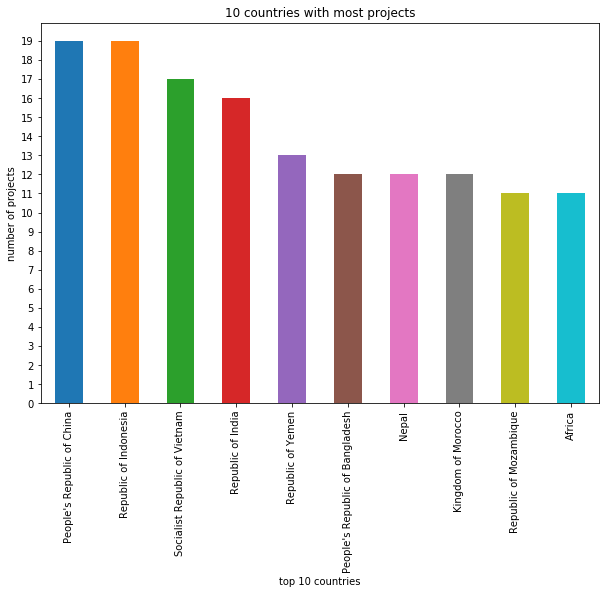

In [50]:
#plotting a bar chart with countries on x-axis and no. of projects on y-axis
bar_chart=top_10_countries.plot(kind='bar',figsize=(10,7) ,yticks=(np.arange(0, 20, step=1)))
bar_chart.set_xlabel("top 10 countries")
bar_chart.set_ylabel("number of projects")
bar_chart.set_title("10 countries with most projects")

2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [77]:
top_10_project_themes=df['mjtheme_namecode'].value_counts()[0:10].reset_index()
top_10_project_themes.columns=['project_theme', 'count']

[[{'code': '11', 'name': 'Environment and natural resources management'},
  {'code': '11', 'name': 'Environment and natural resources management'}],
 [{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}],
 [{'code': '8', 'name': 'Human development'},
  {'code': '8', 'name': 'Human development'}],
 [{'code': '4', 'name': 'Financial and private sector development'},
  {'code': '4', 'name': 'Financial and private sector development'}],
 [{'code': '2', 'name': 'Public sector governance'},
  {'code': '2', 'name': 'Public sector governance'},
  {'code': '2', 'name': 'Public sector governance'}],
 [{'code': '8', 'name': 'Human development'},
  {'code': '8', 'name': 'Human development'},
  {'code': '8', 'name': 'Human development'},
  {'code': '8', 'name': 'Human development'},
  {'code': '8', 'name': 'Human development'}],
 [{'code': '8', 'name': 'Human development'},
  {'code': '7', 'name': 'Social dev/gender/inclusion'}],
 [{'code': '4', 'name': 'Financial and private sec

In [91]:
top_10_project_themes

,project_theme,count
0,"[{'code': '11', 'name': 'Environment and natur...",13
1,"[{'code': '8', 'name': 'Human development'}, {...",10
2,"[{'code': '8', 'name': 'Human development'}, {...",8
3,"[{'code': '4', 'name': 'Financial and private ...",6
4,"[{'code': '2', 'name': 'Public sector governan...",6
5,"[{'code': '8', 'name': 'Human development'}, {...",5
6,"[{'code': '8', 'name': 'Human development'}, {...",5
7,"[{'code': '4', 'name': 'Financial and private ...",5
8,"[{'code': '6', 'name': 'Social protection and ...",4
9,"[{'code': '11', 'name': 'Environment and natur...",4


3.you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [89]:
#creating a dictionary with codes as keys and value as the project theme(this is required to fill in
# the missing the names)
code_to_name_dict={}
for i in list(top_10_project_themes['project_theme']):
    for d in i:
        if code_to_name_dict.get(d['code']) is None:
            code_to_name_dict[d['code']] = d['name']

In [87]:
#filling in the missing values according to their code
for theme in top_10_project_themes['project_theme']:
    for code_name_dic in theme:
        if code_name_dic['name'] == '':
            code_name_dic['name'] = code_to_name_dict[code_name_dic['code']]

In [86]:
#new dataframe with missing values filled in
top_10_project_themes

,project_theme,count
0,"[{'code': '11', 'name': 'Environment and natur...",13
1,"[{'code': '8', 'name': 'Human development'}, {...",10
2,"[{'code': '8', 'name': 'Human development'}, {...",8
3,"[{'code': '4', 'name': 'Financial and private ...",6
4,"[{'code': '2', 'name': 'Public sector governan...",6
5,"[{'code': '8', 'name': 'Human development'}, {...",5
6,"[{'code': '8', 'name': 'Human development'}, {...",5
7,"[{'code': '4', 'name': 'Financial and private ...",5
8,"[{'code': '6', 'name': 'Social protection and ...",4
9,"[{'code': '11', 'name': 'Environment and natur...",4


Text(0.5, 1.0, 'top 10 project themes')

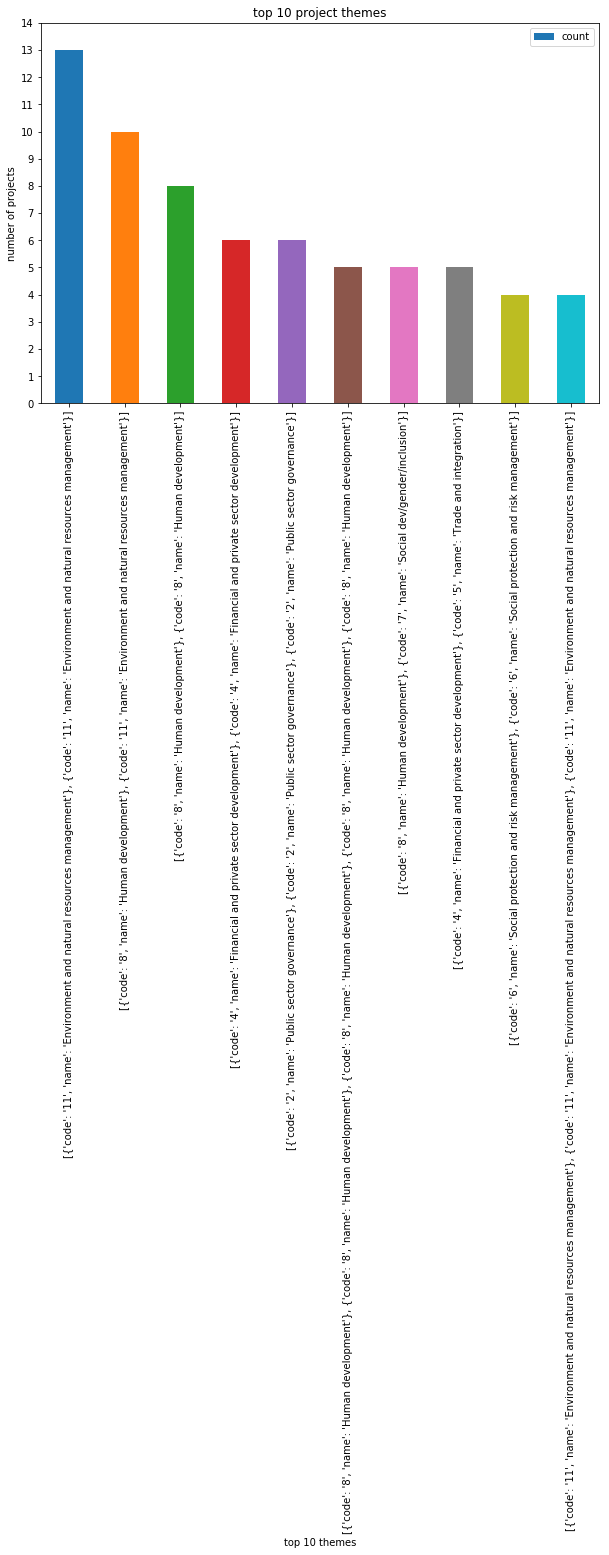

In [90]:
#plotting a bar chart with project themes on x-axis and their count on y-axis
bar_chart=top_10_project_themes.plot(kind='bar',x='project_theme', y='count', figsize=(10,7) ,yticks=(np.arange(0, 15, step=1)))
bar_chart.set_xlabel("top 10 themes")
bar_chart.set_ylabel("number of projects")
bar_chart.set_title("top 10 project themes")